In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install sklearn

In [3]:
!pip install emoji

     |████████████████████████████████| 184 kB 4.0 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=bba298298ade5ca25582544200b7058ffba8c47d06c84e489fe0205e8b4370f8
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [4]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

# importing required libraries and packages
import emoji

import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print(emoji.emojize(":laptop:")*5,"All the required libraries and packages are imported successfully !!!",emoji.emojize(":laptop:")*5)

💻💻💻💻💻 All the required libraries and packages are imported successfully !!! 💻💻💻💻💻


# <font color=red>Data Preprocessing</font>

In [5]:
cat_data_trans = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/cat_data.csv", index_col=0)
num_data_trans = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/num_data.csv",index_col=0)
print(emoji.emojize(":file_folder:")*5
      ," cat_data_trans & num_data_trans loaded successfully !!!"
      ,emoji.emojize(":file_folder:")*5)

📁📁📁📁📁  cat_data_trans & num_data_trans loaded successfully !!! 📁📁📁📁📁


In [6]:
# highlighting postive & negative values
def above_zero(val):
  if val > 0:
    color = 'green'
  elif val < 0:
    color = 'red'
  else:
    color = 'black'   
  return 'color: %s' % color

In [7]:
# To have a glimpse of the data
print("\nGlimpse of Categorical data : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

#Replacing 'unknown' by NaN
cat_data_trans.replace(to_replace="unknown", value=np.nan, inplace=True)

cat_data_trans.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Glimpse of Categorical data :  👇🏻👇🏻👇🏻



,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,nan,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
5,services,married,basic.9y,nan,no,no,telephone,may,mon,nonexistent
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent
7,blue-collar,married,nan,nan,no,no,telephone,may,mon,nonexistent
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent


#### <font color=green>1. Removing Unwanted Columns</font>

In [8]:
#removing 'duration','default','day_of_week' attributes
cat_data_trans = cat_data_trans.drop(["default","day_of_week"],axis=1)
num_data_trans = num_data_trans.drop("duration",axis=1)
print(emoji.emojize(":scissors:")*5
      ,"Unwanted columns successfully removed !!!"
      ,emoji.emojize(":scissors:")*5)

✂✂✂✂✂ Unwanted columns successfully removed !!! ✂✂✂✂✂


In [10]:
print('\nColumns & Rows of both the dataframes \n\n'
,"\t   ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print("Categorical Dataframe : ",cat_data_trans.shape)
print("Numerical Dataframe : ",num_data_trans.shape)


Columns & Rows of both the dataframes 

 	    👇🏻👇🏻👇🏻

Categorical Dataframe :  (41188, 8)
Numerical Dataframe :  (41188, 10)


#### <font color=green>2. Handling missing values</font>

In [11]:
# Imputation of missing values by the modal value
print('\nImputating missing values by the modal value : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
#cat_data_trans = cat_data_trans.fillna(cat_data_trans.value_counts().index[0])
cat_data_trans_imputed = cat_data_trans.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data_trans_imputed.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#2B0E46'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Imputating missing values by the modal value :  👇🏻👇🏻👇🏻



,job,marital,education,housing,loan,contact,month,poutcome
0,housemaid,married,basic.4y,no,no,telephone,may,nonexistent
1,services,married,high.school,no,no,telephone,may,nonexistent
2,services,married,high.school,yes,no,telephone,may,nonexistent
3,admin.,married,basic.6y,no,no,telephone,may,nonexistent
4,services,married,high.school,no,yes,telephone,may,nonexistent
5,services,married,basic.9y,no,no,telephone,may,nonexistent
6,admin.,married,professional.course,no,no,telephone,may,nonexistent
7,blue-collar,married,university.degree,no,no,telephone,may,nonexistent
8,technician,single,professional.course,yes,no,telephone,may,nonexistent
9,services,single,high.school,yes,no,telephone,may,nonexistent


#### <font color=green>3. Handling Outliers</font>

#### <font color=red>Feature : age</font>

<font color=skyblue>It looks like normal distribution. The skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values(outliers). Assuming that age follows a Gaussian Distribution we will calculate the boundaries which differentiate the outliers. We have computed Interquantile range as 15.</font>

In [12]:
#calculating the boundaries which differentiate the outliers
IQR = num_data_trans.age.quantile(0.75)-num_data_trans.age.quantile(0.25)
lower_bridge = num_data_trans['age'].quantile(0.25)-(IQR*1.5)
upper_bridge = num_data_trans['age'].quantile(0.75)+(IQR*1.5)
print('\nLower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
print("lower boundary limit : {} \nupper boundary limit : {}".format(lower_bridge,upper_bridge))


Lower & Upper Limits  
      👇🏻👇🏻👇🏻

lower boundary limit : 9.5 
upper boundary limit : 69.5


<font color=skyblue>The maximum value of age is 98 years and from here we can see that the age value above 69.5 should be treated as outliers.</font>

In [13]:
#replace outliers with upper boundary limit
num_data_trans.loc[num_data_trans['age']>=69.5,'age'] = 69.5

print(emoji.emojize(":plus:")*3
,"Outliers successfully replaced"
,emoji.emojize(":plus:")*3)

➕➕➕ Outliers successfully replaced ➕➕➕


In [14]:
num_data_trans.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#117A65'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,56.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
1,57.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
2,37.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
3,40.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
4,56.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
5,45.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
6,59.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
7,41.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
8,24.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
9,25.000000,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0


In [15]:
%cd "/content/drive/MyDrive/ColabNotebooks/1000_PBM"

/content/drive/MyDrive/ColabNotebooks/1000_PBM


In [16]:
print(emoji.emojize(":file_folder:")*5,"Directory is changed as above !!!",emoji.emojize(":file_folder:")*5)

📁📁📁📁📁 Directory is changed as above !!! 📁📁📁📁📁


In [17]:
!pip install import-ipynb


  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=65905d7ae0b80ef8fe6afb15eca10a9b2607577269a967286fc70286b937cfcf
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


importing Jupyter notebook from pbm01.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     |████████████████████████████████| 206 kB 4.1 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
     |████████████████████████████████| 9.5 MB 24.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=1682e87450584d36e1567ee630c4dbcb9797ad7ba514c0e9a6e95598a9cd8979
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=342eb1bfa4414f0ccedddea5711da23709f65f89fc480c3ff31ca0ea2c592148
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstal

💻💻💻💻💻 All the required libraries and packages are imported successfully !!! 💻💻💻💻💻
📁📁📁📁📁 Data loaded successfully !!! 📁📁📁📁📁
No. of clients : 41188
No. of features : 21 including target
No. of clients who haven't subscribed the term deposit : 36548
No. of clients who have subscribed the term deposit : 4640

 📈📈 Plotting the graph to check the dataset 📈📈 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  ob

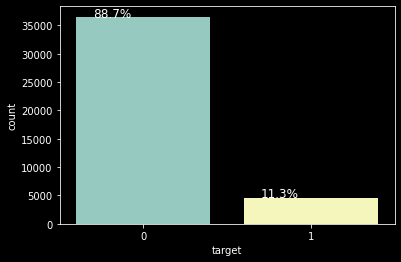

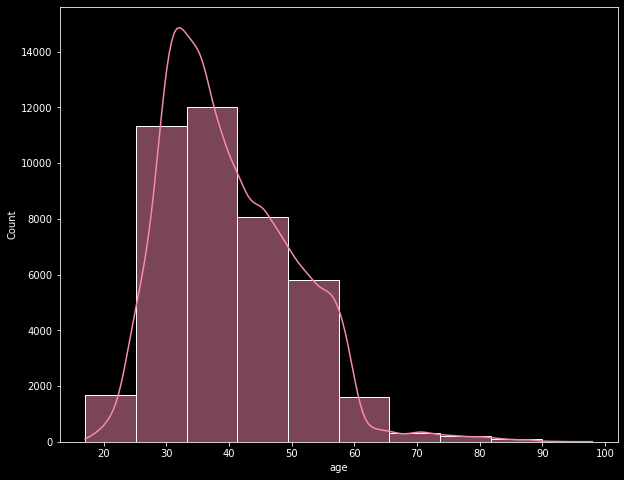


 📃📃 Discription: clients' age 📃📃

 📈📈 Boxplot of 'age' w.r.t target 📈📈 




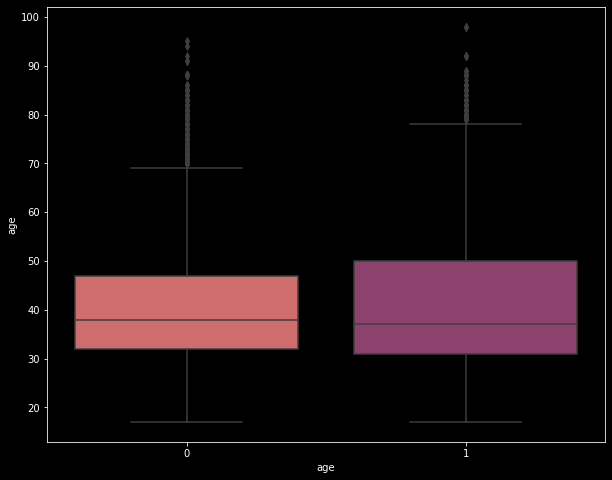


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 


Grouping the clients on the basis of age : 

 	 👇🏻👇🏻👇🏻


 📈📈 Plotting the clients on the basis of age group 📈📈 



 📈📈 Distribution of 'campaign'  📈📈



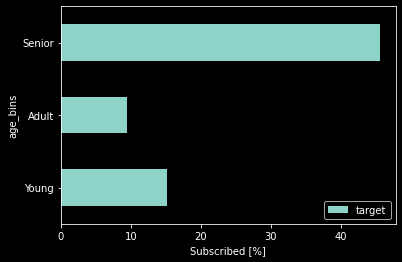

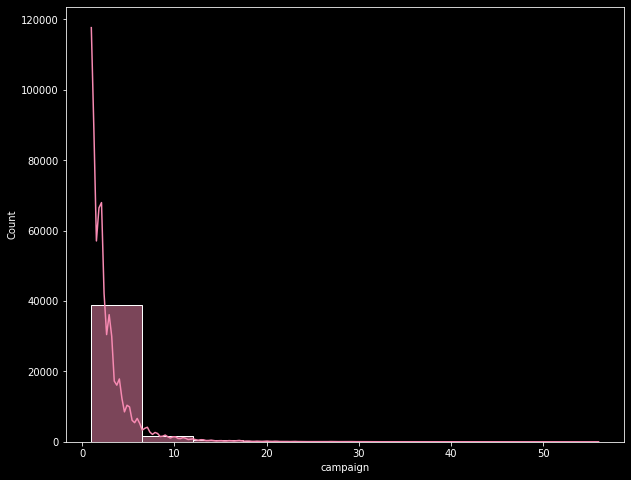


 📃📃 Discription: number of contacts performed during this campaign and for this client included last contact 📃📃

 📈📈 Boxplot of 'campaign' w.r.t target 📈📈 




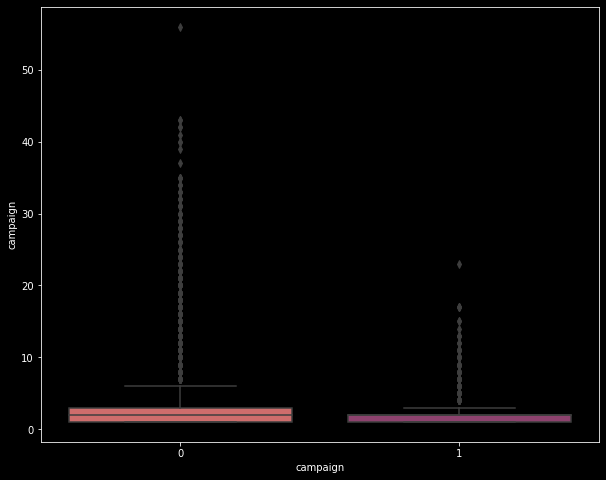


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 


 📈📈 Distribution of 'pdays'  📈📈



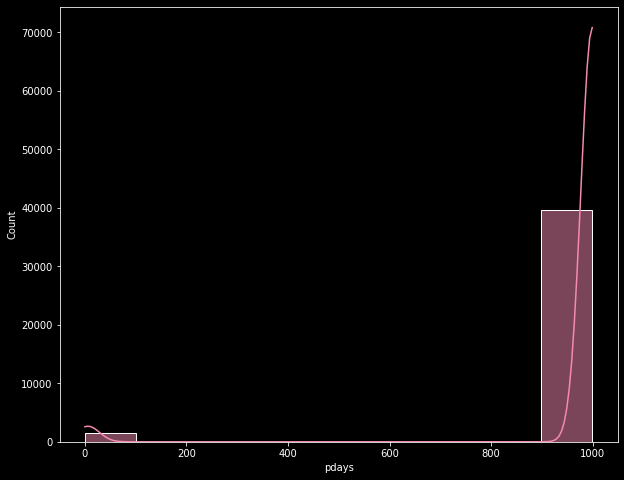


 📃📃 Discription: number of days that passed by after the client was last contacted from a previous campaign 📃📃

Unique Values in "pdays" 

   👇🏻👇🏻👇🏻


 📈📈 Boxplot of 'pdays' w.r.t target 📈📈 




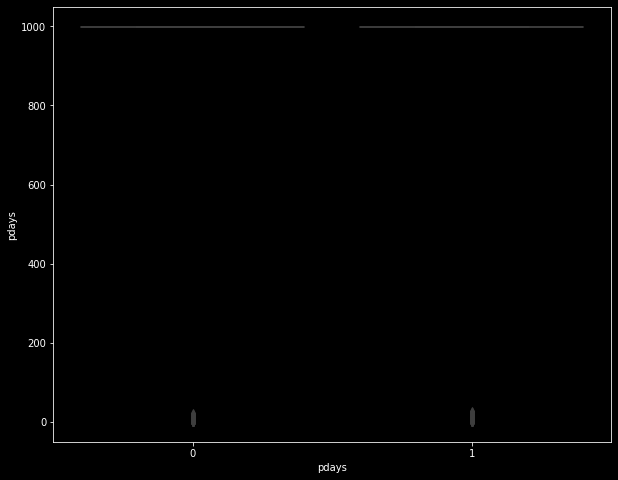


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 


 📈📈 No. of days passed by after the client was last contacted from a previous campaign 📈📈 




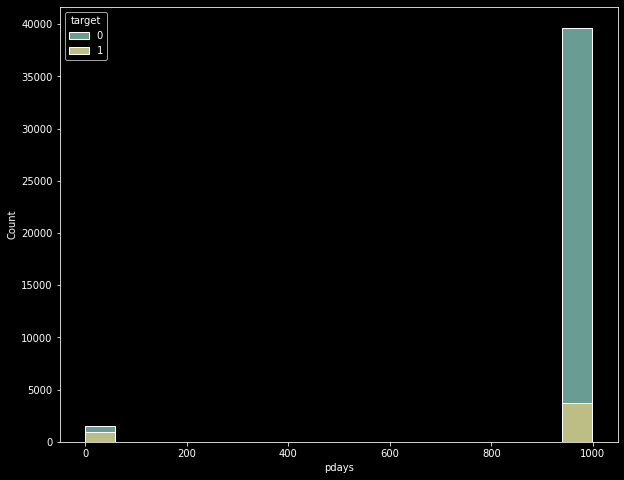


 📈📈 Plotting the days that passed by after previous campaign 📈📈 

Median: 6.0


 📈📈 Distribution of 'previous'  📈📈



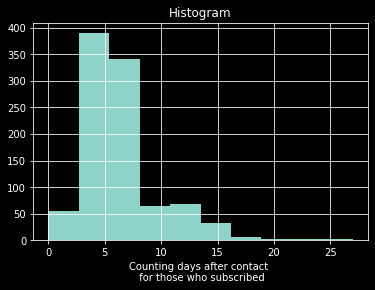

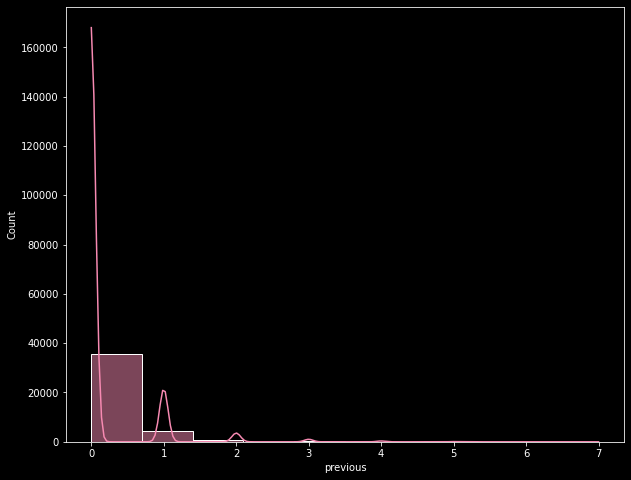


 📃📃 Discription: number of contacts performed before this campaign and for this client 📃📃

Unique Values in "previous" 

   👇🏻👇🏻👇🏻

People who were previously contacted with success 👉🏻👉🏻  4252

People who were previously contacted with failure 👉🏻👉🏻  1373


 📈📈 Plotting the people who were previously contacted 📈📈 



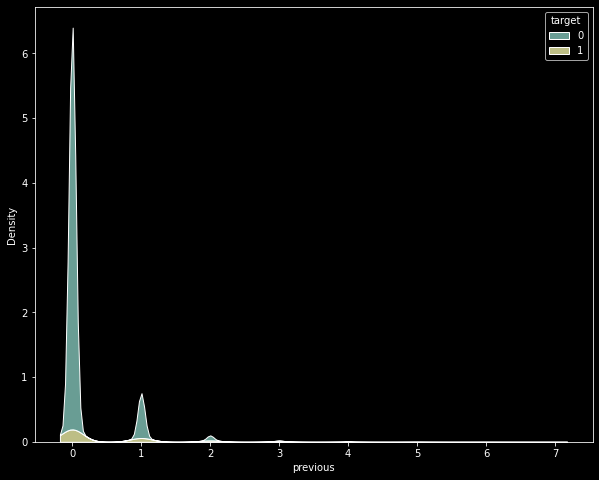


 📈📈 Boxplot of the people who were previously contacted 📈📈 



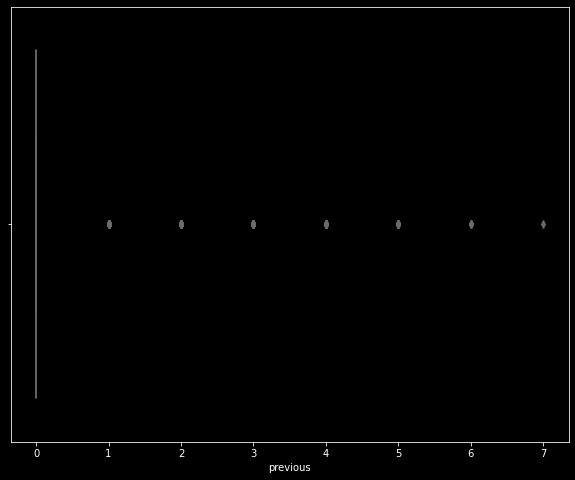


 📈📈 Boxplot of 'previous' w.r.t target 📈📈 




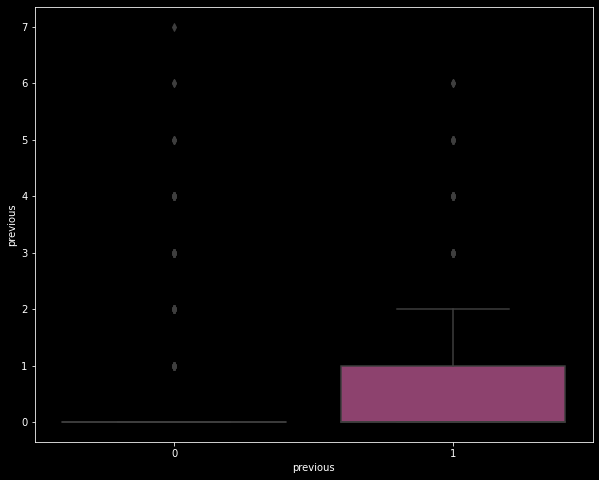


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 


 📈📈 Distribution of 'emp_var_rate'  📈📈



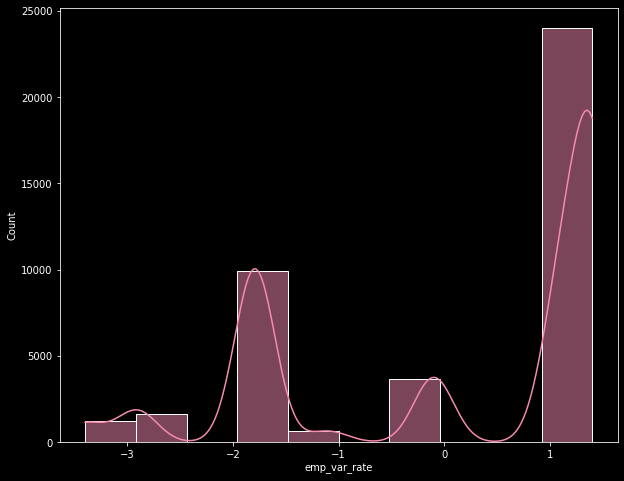


 📃📃 Discription: employment variation rate - quarterly indicator 📃📃

Unique Values in "emp_var_rate" 

 	 👇🏻👇🏻👇🏻


Employment Variation Rate with successful subscription  

 	 👇🏻👇🏻👇🏻


Employment Variation Rate with failure in subscription  

 👇🏻👇🏻👇🏻


 📈📈 Boxplot of 'emp_var_rate' w.r.t target 📈📈 




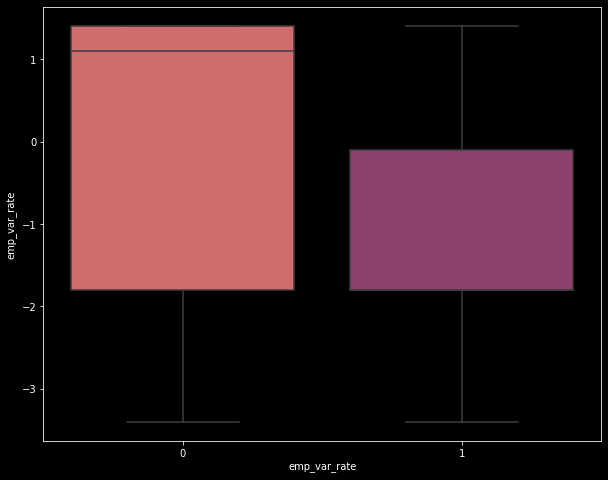


 ✔✔ 👍🏻👍🏻 NO Outliers 👍🏻👍🏻 ✔✔ 


 📈📈 Distribution of 'cons_price_idx'  📈📈



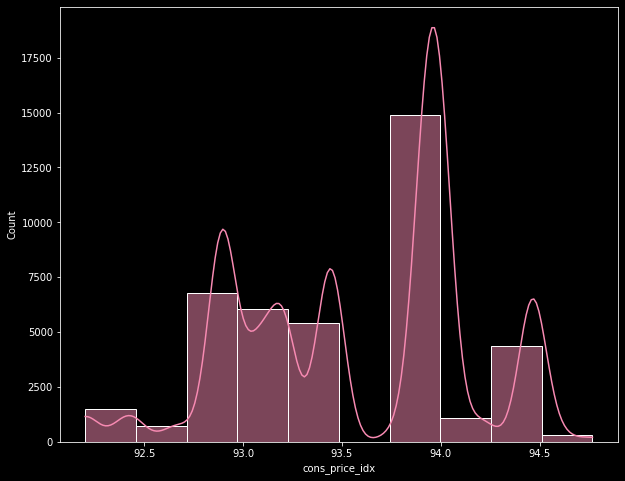


 📃📃 Discription: consumer price index - monthly indicator 📃📃

 📈📈 Boxplot of 'cons_price_idx' w.r.t target 📈📈 




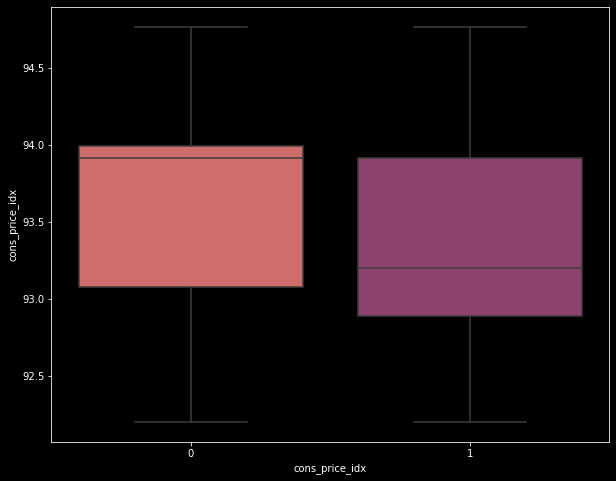


 ✔✔ 👍🏻👍🏻 NO Outliers 👍🏻👍🏻 ✔✔ 


 📈📈 Distribution of 'cons_conf_idx'  📈📈



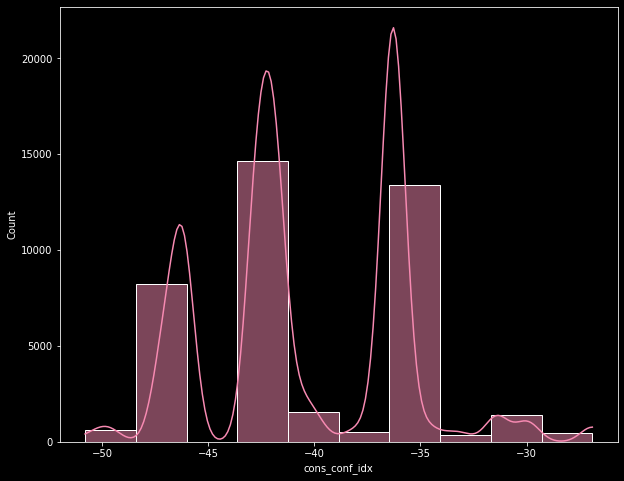


 📃📃 Discription: consumer confidence index - monthly indicator 📃📃

 📈📈 Boxplot of 'cons_conf_idx' w.r.t target 📈📈 




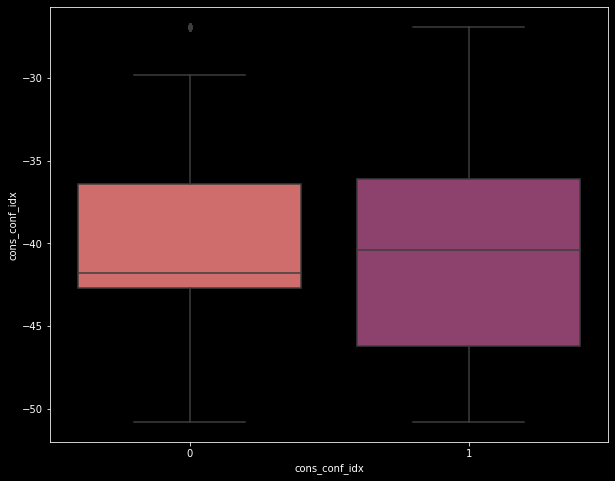


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 


 📈📈 Distribution of 'euribor3m'  📈📈



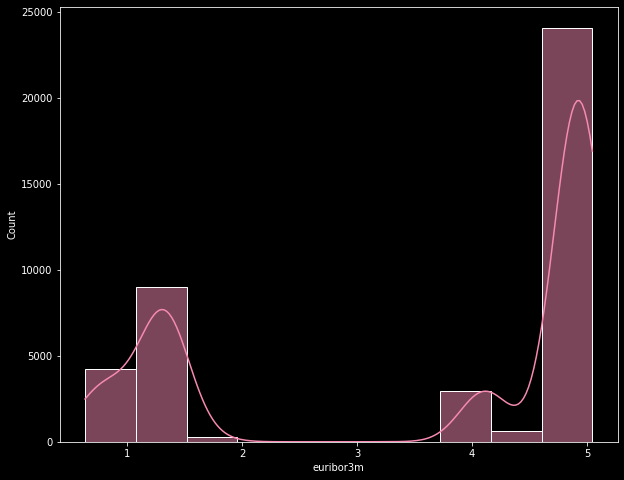


 📃📃 Discription: euribor 3 month rate - daily indicator 📃📃

 📈📈 Boxplot of 'euribor3m' w.r.t target 📈📈 




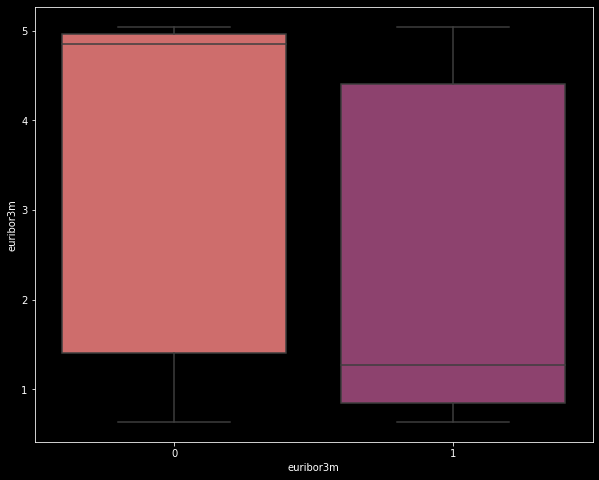


 ✔✔ 👍🏻👍🏻 NO Outliers 👍🏻👍🏻 ✔✔ 


 📈📈 Distribution of 'nr_employed'  📈📈



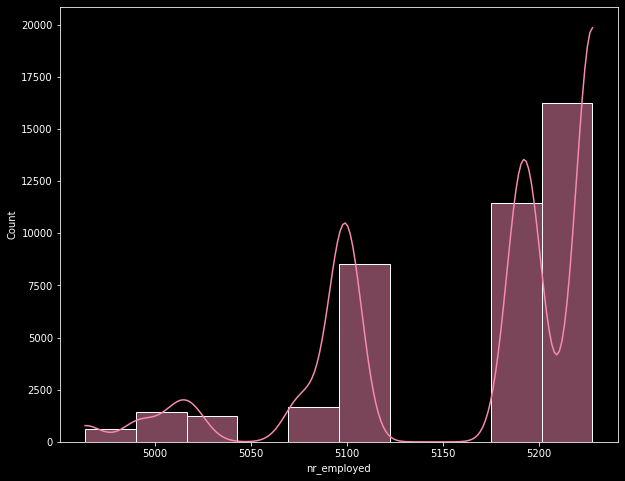


 📃📃 Discription: number of employed citizens - quarterly indicator 📃📃

 📈📈 Plotting no. of employed people 📈📈 



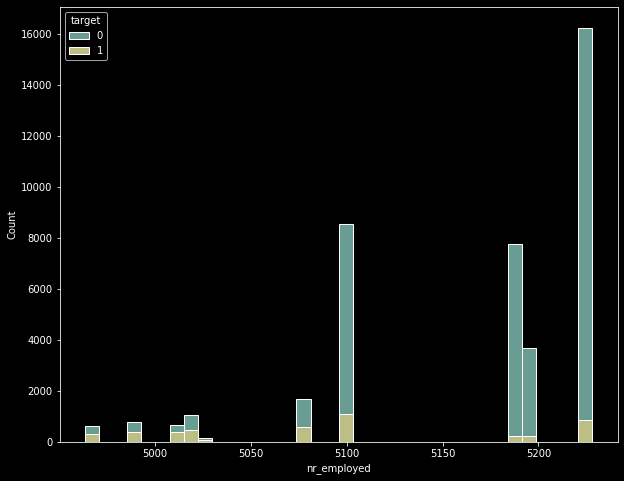


 📈📈 Boxplot of 'nr_employed' w.r.t target 📈📈 




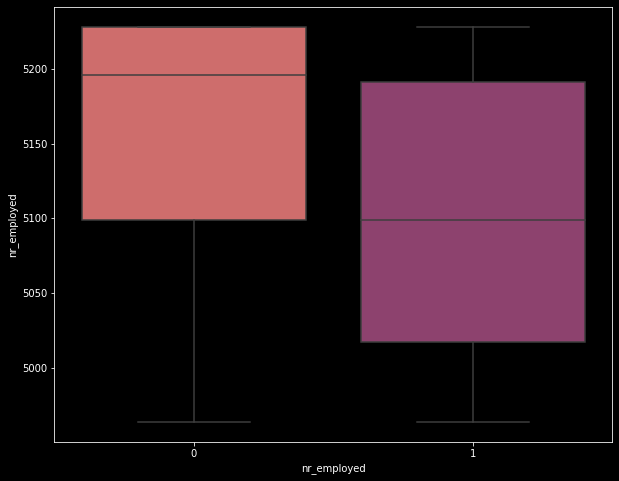


 ✔✔ 👍🏻👍🏻 NO Outliers 👍🏻👍🏻 ✔✔ 


The variable 'job' has 12 categories  
 		 👇🏻👇🏻👇🏻 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

The variable 'marital' has 4 categories  
 		 👇🏻👇🏻👇🏻 
 ['married' 'single' 'divorced' 'unknown']

The variable 'education' has 8 categories  
 		 👇🏻👇🏻👇🏻 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

The variable 'default' has 3 categories  
 		 👇🏻👇🏻👇🏻 
 ['no' 'unknown' 'yes']

The variable 'housing' has 3 categories  
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes' 'unknown']

The variable 'loan' has 3 categories  
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes' 'unknown']

The variable 'contact' has 2 categories  
 		 👇🏻👇🏻👇🏻 
 ['telephone' 'cellular']

The variable 'month' has 10 categories  
 		 👇🏻👇🏻👇🏻 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

The variable 'day_of_week' has 5 categories  
 		 👇🏻👇🏻👇🏻 
 ['

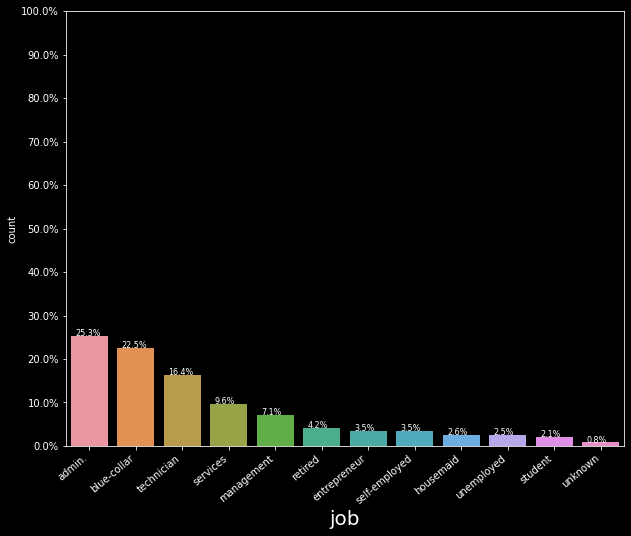


 📃📃 Discription: type of job 📃📃

 📈📈 Distribution of 'job' w.r.t target 📈📈



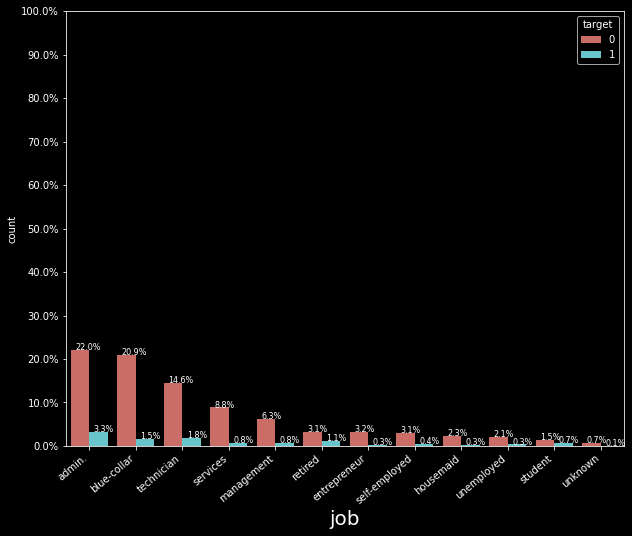


 📈📈 Plotting customers by profession and age 📈📈 



 📈📈 Distribution of 'marital'  📈📈



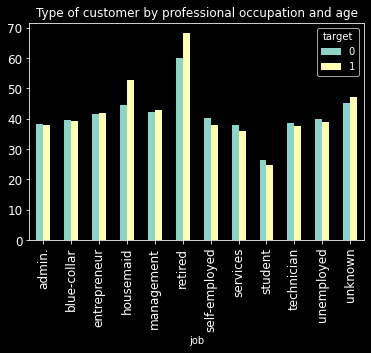

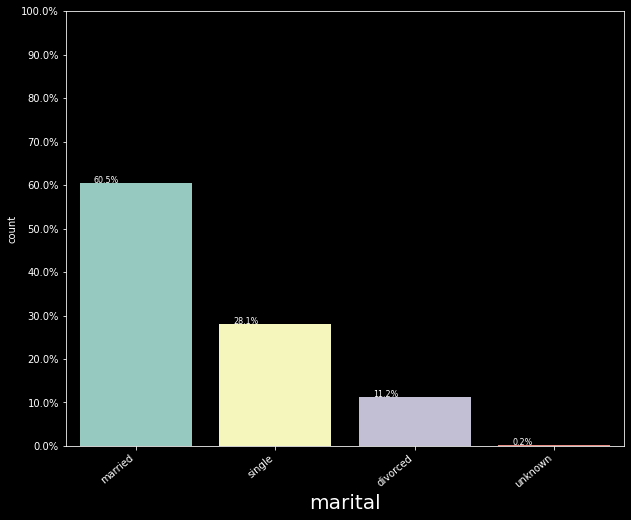


 📃📃 Discription: Marital situation 📃📃

 📈📈 Distribution of 'marital' w.r.t target 📈📈



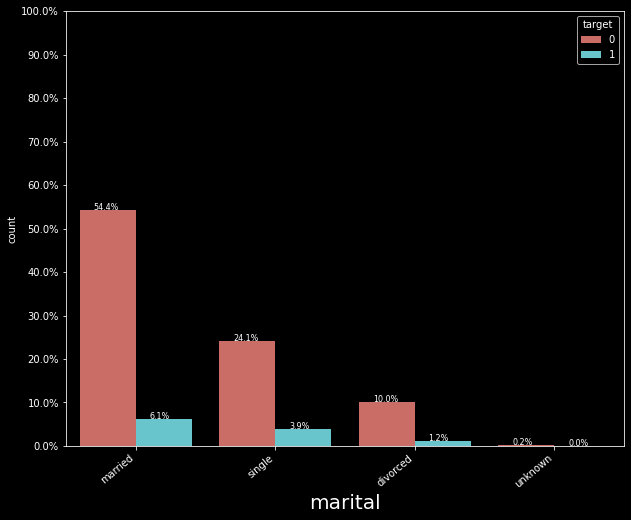



 📈📈 Distribution of 'education'  📈📈



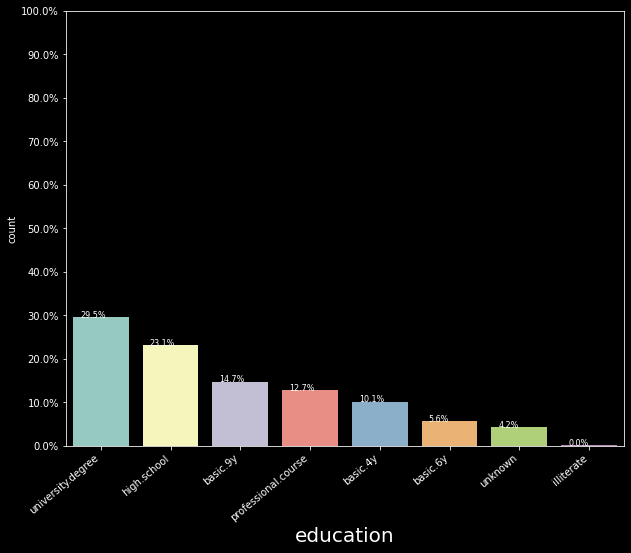


 📃📃 Discription: Education level 📃📃

 📈📈 Distribution of 'education' w.r.t target 📈📈



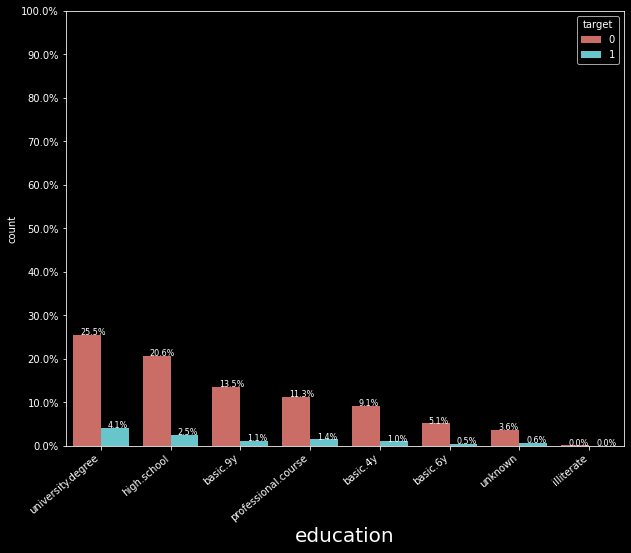



 📈📈 Distribution of 'default'  📈📈



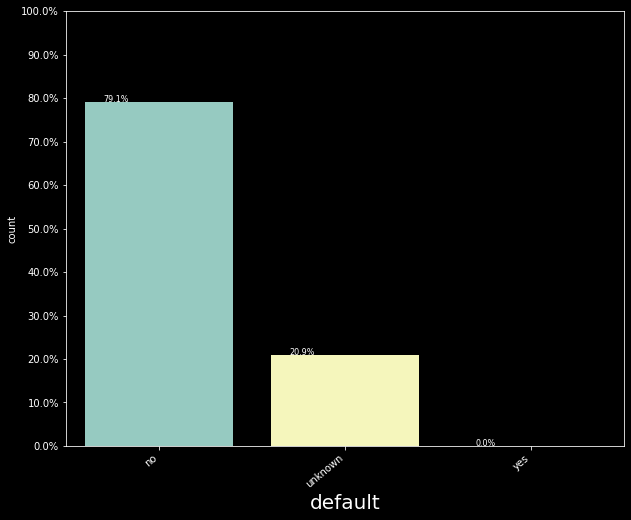


 📃📃 Discription: has credit in default? 📃📃

 📈📈 Distribution of 'default' w.r.t target 📈📈



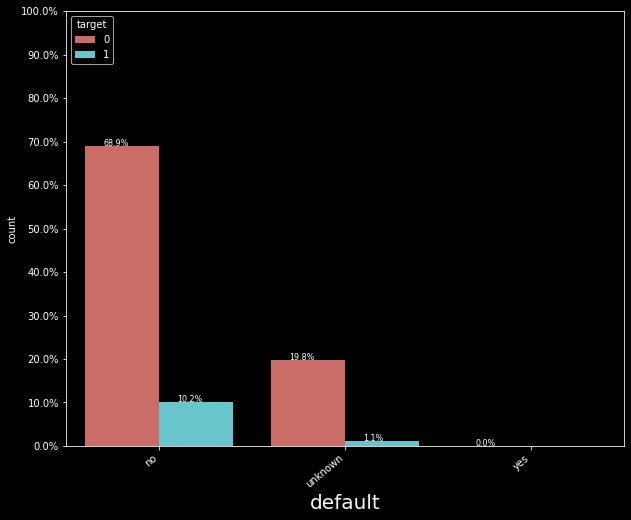



 📈📈 Distribution of 'housing'  📈📈



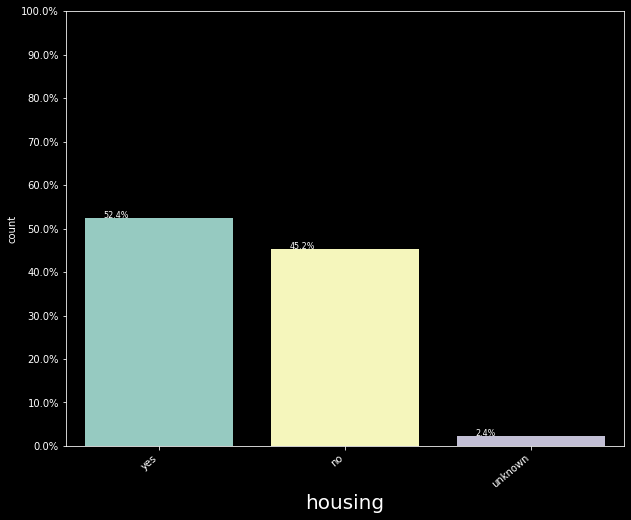


 📃📃 Discription: has housing loan? 📃📃

 📈📈 Distribution of 'housing' w.r.t target 📈📈



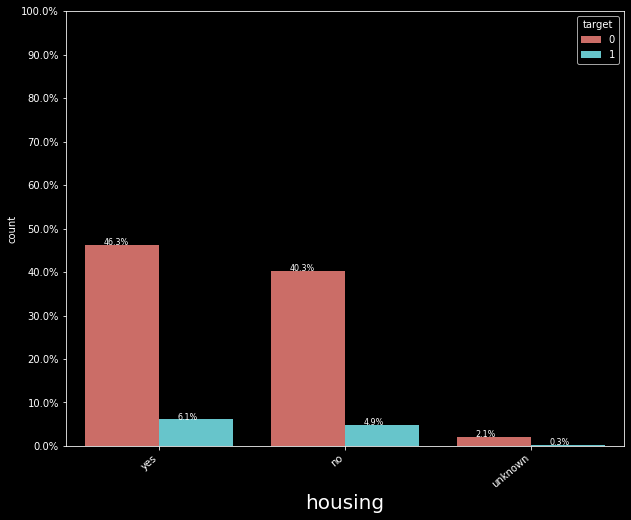



 📈📈 Distribution of 'loan'  📈📈



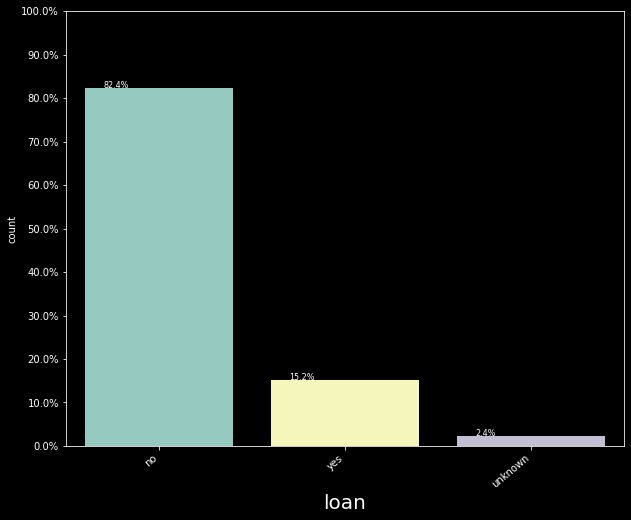


 📃📃 Discription: has personal loan? 📃📃

 📈📈 Distribution of 'loan' w.r.t target 📈📈



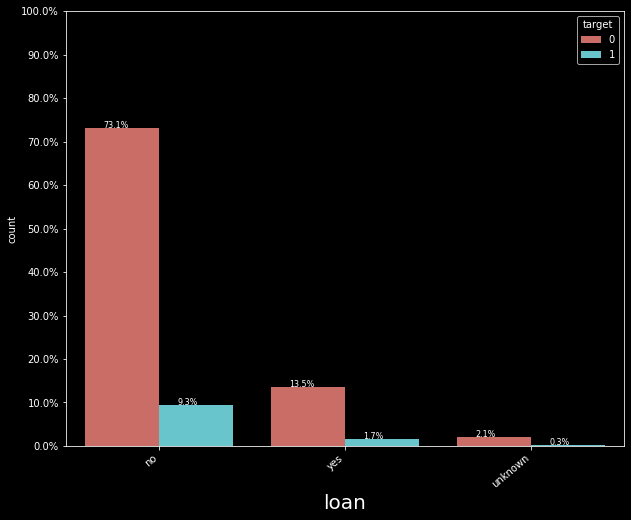



 📈📈 Distribution of 'contact'  📈📈



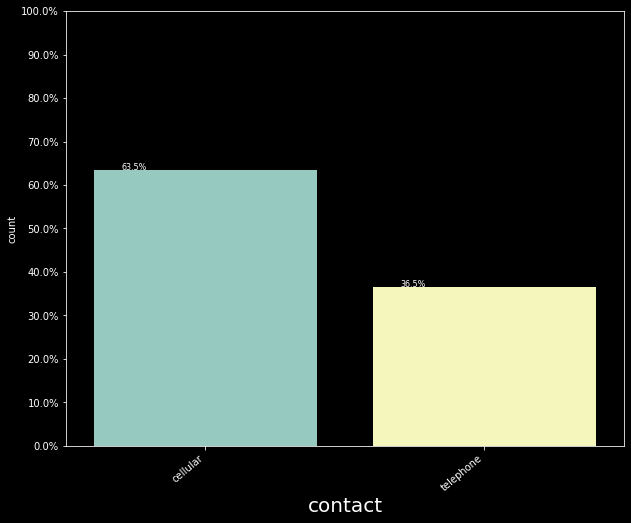


 📃📃 Discription: contact communication type 📃📃

 📈📈 Distribution of 'contact' w.r.t target 📈📈



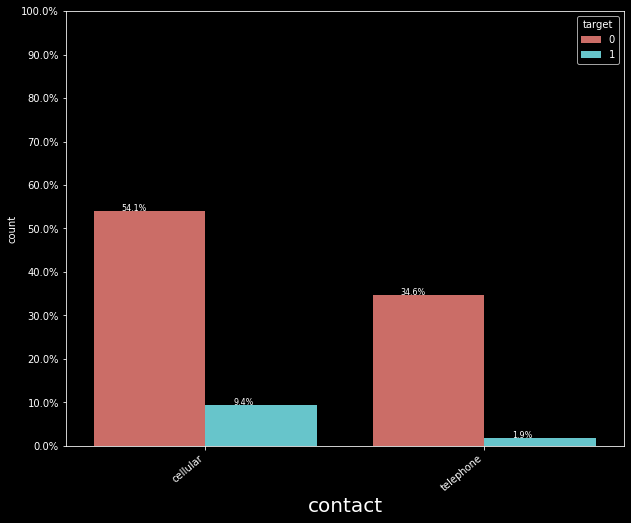



 📈📈 Distribution of 'month'  📈📈



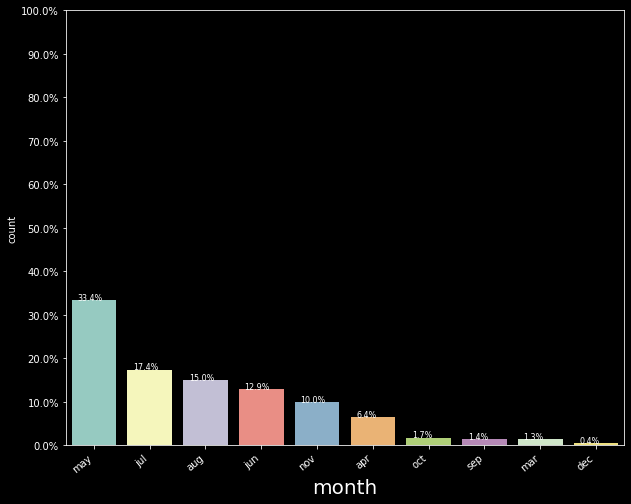


 📃📃 Discription: last contact month of year 📃📃

 📈📈 Distribution of 'month' w.r.t target 📈📈



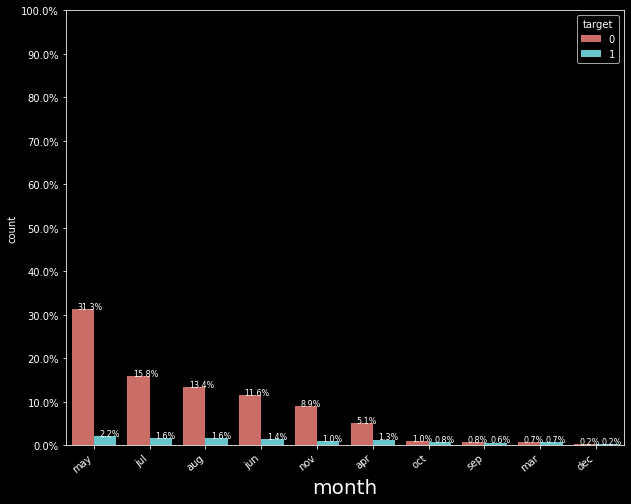



 📈📈 Distribution of 'day_of_week'  📈📈



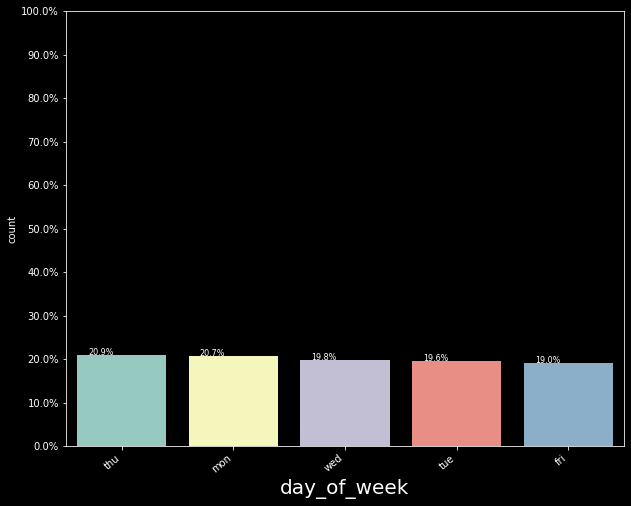


 📃📃 Discription: last contact day of the week 📃📃

 📈📈 Distribution of 'day_of_week' w.r.t target 📈📈



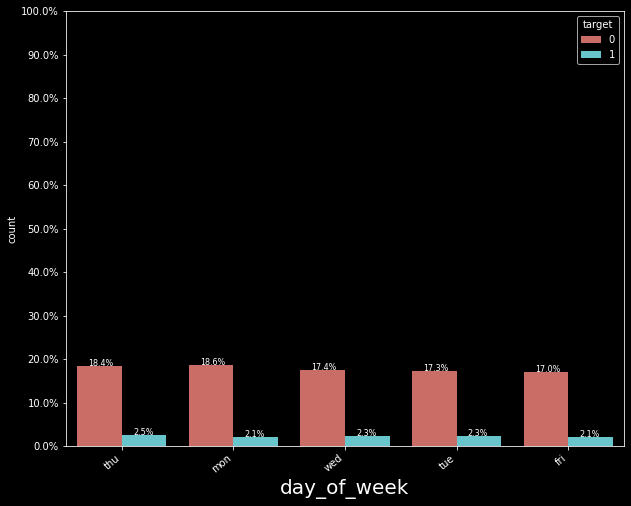



 📈📈 Distribution of 'poutcome'  📈📈



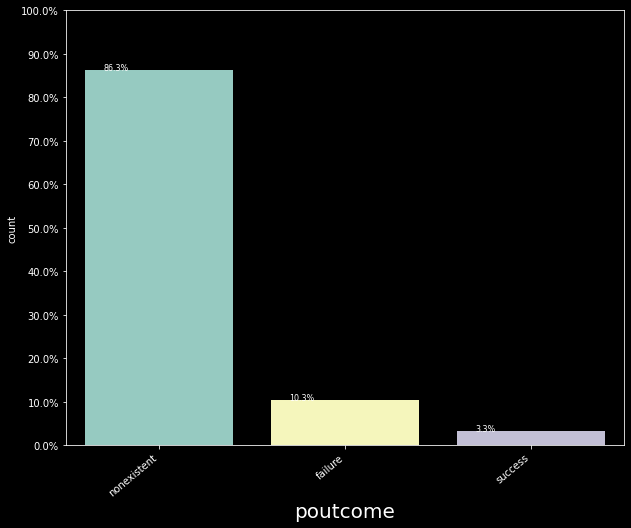


 📃📃 Discription: outcome of the previous marketing campaign 📃📃

 📈📈 Distribution of 'poutcome' w.r.t target 📈📈



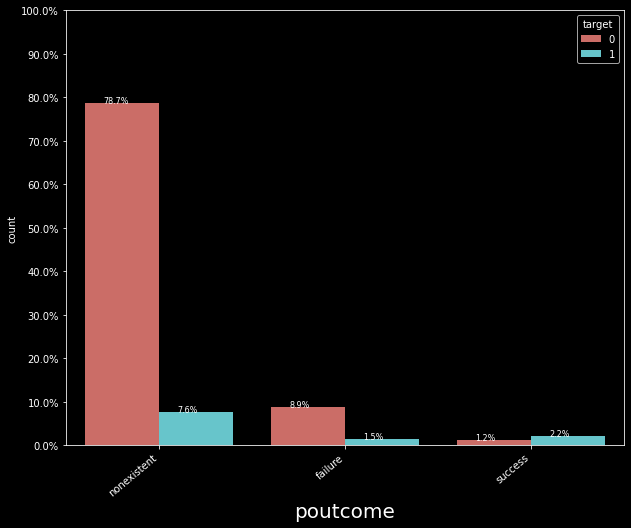


 📈📈📈📈📈📈📈📈📈📈 	 Plotting most common categories 	 📈📈📈📈📈📈📈📈📈📈 


 📈📈📈📈📈📈📈📈📈📈 	 Plotting most common categories influencing the target 	 📈📈📈📈📈📈📈📈📈📈 


Numeric features most correlated with the target 

 	 👇🏻👇🏻👇🏻


Ordered by rank in absolute values

 	 👇🏻👇🏻👇🏻


 📈📈📈📈📈📈📈📈 	 Heatmap visualization: Pearson 	 📈📈📈📈📈📈📈📈 


Checking the predicting power of the features

 		 👇🏻👇🏻👇🏻


The 10 most correlated numerical pairs by Spearman method

 		 👇🏻👇🏻👇🏻


 📈📈📈📈📈📈📈📈 	 Heatmap visualization: Spearman 	 📈📈📈📈📈📈📈📈 

📁📁📁📁📁 All the Data files are saved successfully !!! 📁📁📁📁📁


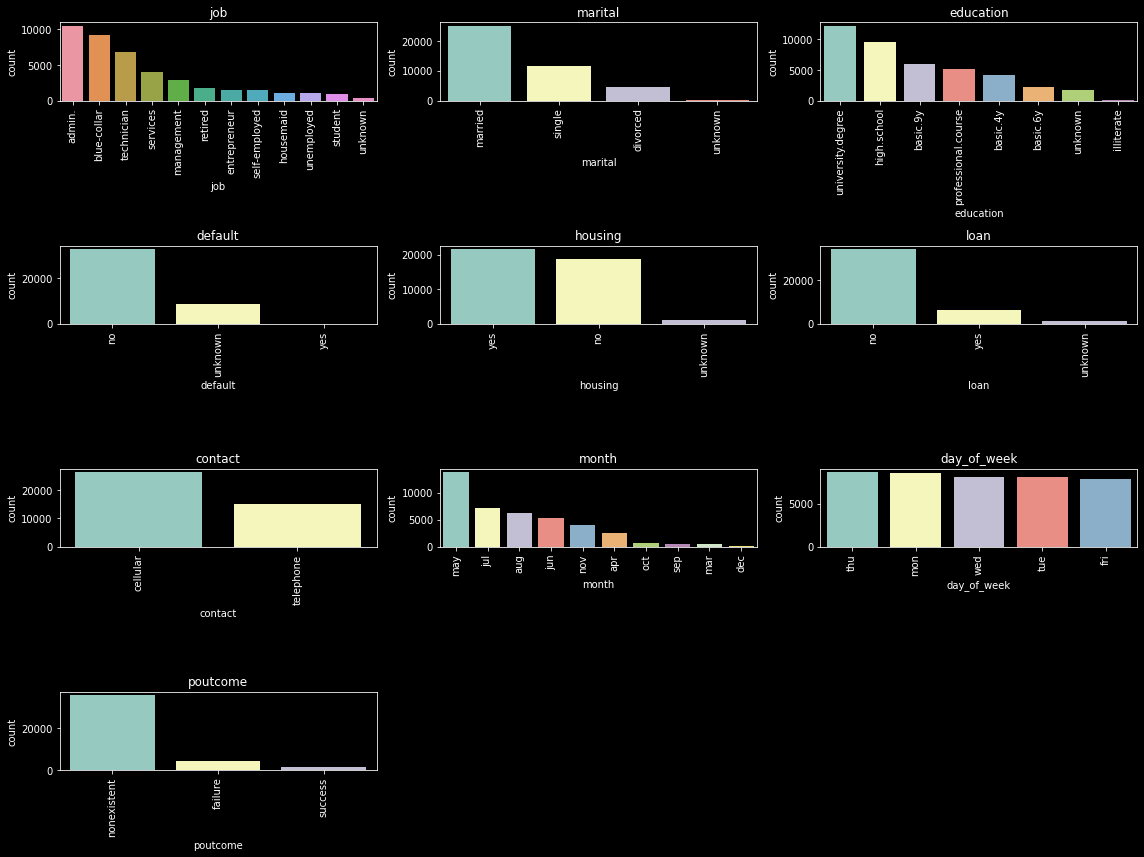

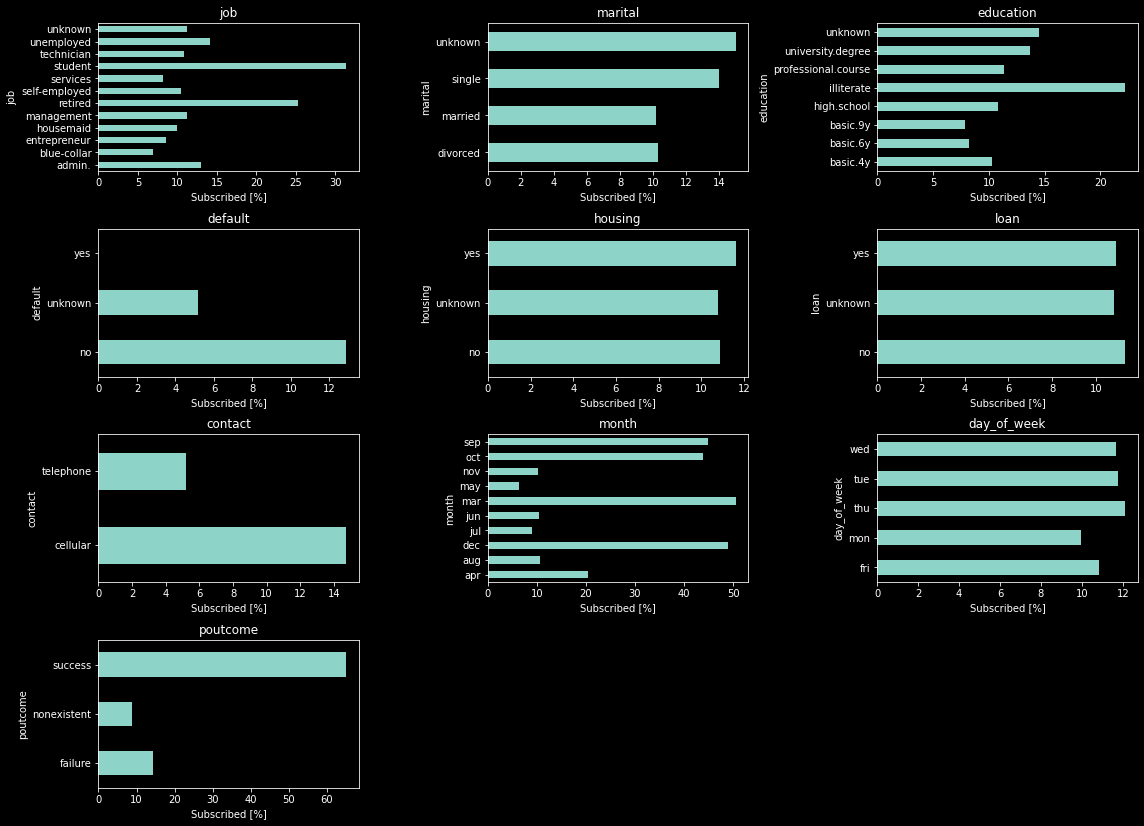

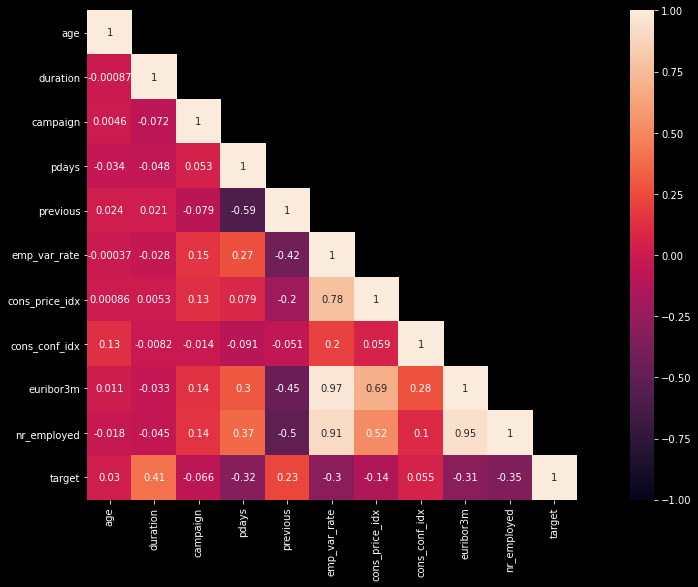

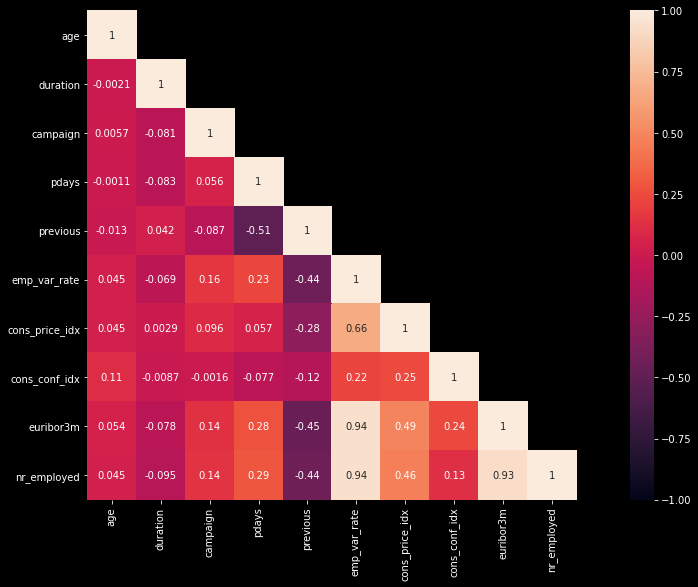

In [18]:
import import_ipynb
import pbm01

In [19]:
print(emoji.emojize(":laptop:")*5,"The required library and the python notebook  are imported successfully !!!",emoji.emojize(":laptop:")*5)

💻💻💻💻💻 The required library and the python notebook  are imported successfully !!! 💻💻💻💻💻



 📈📈 Boxplot of 'age' w.r.t target 📈📈 




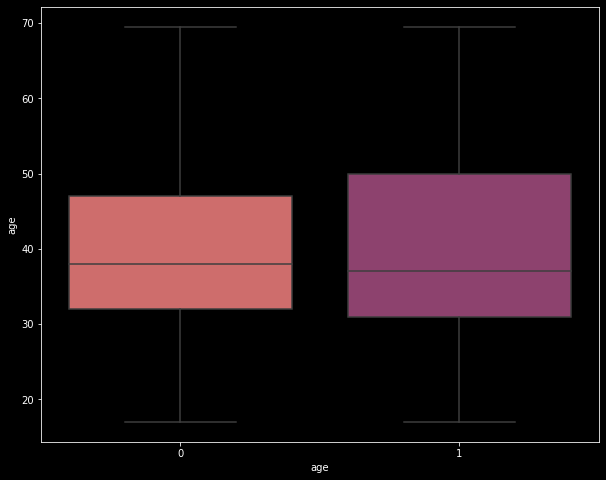


 ✔✔ 👍🏻👍🏻 NO Outliers 👍🏻👍🏻 ✔✔ 



,Parameters,Values
1,Skewness,0.57
2,Kurtosis,-0.25
3,Median,38.00
4,Count,41188.00
5,Mean,39.94
6,Stand. Dev.,10.13
7,Minimum,17.00
8,Q1 (25%),32.00
9,Q2 (50%),38.00
10,Q3 (75%),47.00


In [20]:
#boxplot and other information after handling outlier
pbm01.num_boxplot_wrt_Y('age', num_data_trans)

In [21]:
# displaying each categorical feature with its unique no. of categories
# without the category 'unknown' 
cat_features = [feature for feature in cat_data_trans_imputed.columns if (cat_data_trans_imputed[feature].dtypes=='O')]
print("Categorical variables after imputing 'unknown' values.")
for feature in cat_features:
    print("\nThe variable '{}' has {} categories".format(feature,len(cat_data_trans_imputed[feature].unique()))
    ,"\n"
    ,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3
    ,"\n"
    ,"{}".format(cat_data_trans_imputed[feature].unique()))
 

Categorical variables after imputing 'unknown' values.

The variable 'job' has 11 categories 
 		 👇🏻👇🏻👇🏻 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

The variable 'marital' has 3 categories 
 		 👇🏻👇🏻👇🏻 
 ['married' 'single' 'divorced']

The variable 'education' has 7 categories 
 		 👇🏻👇🏻👇🏻 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

The variable 'housing' has 2 categories 
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes']

The variable 'loan' has 2 categories 
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes']

The variable 'contact' has 2 categories 
 		 👇🏻👇🏻👇🏻 
 ['telephone' 'cellular']

The variable 'month' has 10 categories 
 		 👇🏻👇🏻👇🏻 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

The variable 'poutcome' has 3 categories 
 		 👇🏻👇🏻👇🏻 
 ['nonexistent' 'failure' 'success']


#### <font color=red>Feature : campaign</font>

<font color=skyblue>The histogram shows that 'campaign' attribute is right-skewed and also the skewness value is 4.8. Now we will calculate the extreme boundaries which differentiate the outliers. We have computed Interquantile range as 2.</font>

In [22]:
# Upper & lower limits of outliers
print('\nLower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
print("lower boundary limit : {} \nupper boundary limit : {}".format(lower_bridge,upper_bridge))



Lower & Upper Limits 
 
      👇🏻👇🏻👇🏻

lower boundary limit : 9.5 
upper boundary limit : 69.5


In [23]:
# Extreme outliers
print('\n Extreme Lower & Upper Limits \n'
,"\n"
,"\t"
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
print("lower boundary limit : {} \nupper boundary limit : {}".format(num_data_trans['campaign'].quantile(0.10),num_data_trans['campaign'].quantile(0.90)))



 Extreme Lower & Upper Limits 
 
 	 👇🏻👇🏻👇🏻

lower boundary limit : 1.0 
upper boundary limit : 5.0


In [24]:
#replace outliers with extreme lower & upper boundary limit
num_data_trans.loc[num_data_trans['campaign']<=1,'campaign'] = 1
num_data_trans.loc[num_data_trans['campaign']>=5,'campaign'] = 5
print(emoji.emojize(":plus:")*3
,"Outliers successfully replaced with extreme limits"
,emoji.emojize(":plus:")*3)

➕➕➕ Outliers successfully replaced with extreme limits ➕➕➕



 📈📈 Boxplot of 'campaign' w.r.t target 📈📈 




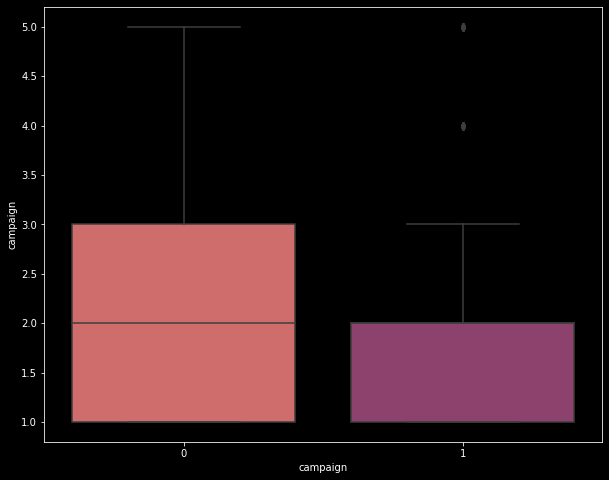


 ✔✔ 👍🏻👍🏻 NO Outliers 👍🏻👍🏻 ✔✔ 



,Parameters,Values
1,Skewness,0.94
2,Kurtosis,-0.38
3,Median,2.00
4,Count,41188.00
5,Mean,2.19
6,Stand. Dev.,1.37
7,Minimum,1.00
8,Q1 (25%),1.00
9,Q2 (50%),2.00
10,Q3 (75%),3.00


In [25]:
#boxplot and other information after handling outliers
pbm01.num_boxplot_wrt_Y('campaign', num_data_trans)

#### <font color=red>Feature : previous</font>

<font color=skyblue>The method used to identify outliers selects many records which is 14% . so decided to keep the records because the data seems to have been measured correctly and reflects reality. To emphasize that the model is not affected by the extension of the no. of outliers, we will only guarantee that we will use a standardization technique that does not neglect to detail the distances between the central values.</font>

#### <font color=red>Feature : cons_conf_idx</font>

<font color=skyblue>Assuming that 'cons_conf_idx' follows a Gaussian Distribution we will calculate the boundaries which differentiate the outliers. We have computed Interquantile range as 6.3.</font>

In [26]:
#calculating the boundaries which differentiate the outliers
print('\nLower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

IQR = num_data_trans.cons_conf_idx.quantile(0.75)-num_data_trans.cons_conf_idx.quantile(0.25)
lower_bridge = num_data_trans['cons_conf_idx'].quantile(0.25)-(IQR*1.5)
upper_bridge = num_data_trans['cons_conf_idx'].quantile(0.75)+(IQR*1.5)
print("lower boundary limit : {:.2f} \nupper boundary limit : {:.2f}".format(lower_bridge,upper_bridge))


Lower & Upper Limits 
 
      👇🏻👇🏻👇🏻

lower boundary limit : -52.15 
upper boundary limit : -26.95


In [27]:
# Extreme outliers
print('\nExtreme Lower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print("lower boundary limit : {} \nupper boundary limit : {}".format(num_data_trans['cons_conf_idx'].quantile(0.10),num_data_trans['cons_conf_idx'].quantile(0.90)))



Extreme Lower & Upper Limits 
 
      👇🏻👇🏻👇🏻

lower boundary limit : -46.2 
upper boundary limit : -36.1


In [28]:
#replace outliers with upper boundary limit
num_data_trans.loc[num_data_trans['cons_conf_idx']>=-36,'cons_conf_idx'] = -36
print(emoji.emojize(":plus:")*3
,"Outliers successfully replaced with extreme limits"
,emoji.emojize(":plus:")*3)

➕➕➕ Outliers successfully replaced with extreme limits ➕➕➕



 📈📈 Boxplot of 'cons_conf_idx' w.r.t target 📈📈 




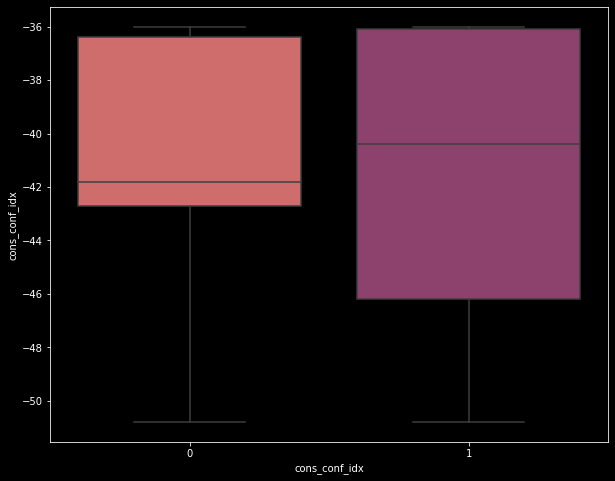


 ✔✔ 👍🏻👍🏻 NO Outliers 👍🏻👍🏻 ✔✔ 



,Parameters,Values
1,Skewness,-0.19
2,Kurtosis,-1.21
3,Median,-41.80
4,Count,41188.00
5,Mean,-40.82
6,Stand. Dev.,4.07
7,Minimum,-50.80
8,Q1 (25%),-42.70
9,Q2 (50%),-41.80
10,Q3 (75%),-36.40


In [29]:
#boxplot and other information after handling outliers
pbm01.num_boxplot_wrt_Y('cons_conf_idx', num_data_trans)

#### <font color=green>5.Transformation</font>

#### <font color=red>Feature : pdays</font>

<font color=skyblue>Our dataset is not evenly distributed as the values in pdays are out of range so we need to scale it. splitting 'pdays' feature into 2 features - 'pdays1' and 'pdays2'</font>

In [30]:
# creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
         
num_data_trans['pdays2']=num_data_trans.apply(lambda row: function(row),axis=1)
print(emoji.emojize(":red_exclamation_mark:")*4
      ," New column created "
      ,emoji.emojize(":red_exclamation_mark:")*4)
# changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
     
num_data_trans['pdays']=num_data_trans.apply(lambda row: function1(row),axis=1)
print("\n",emoji.emojize(":plus:")*2
      ," Replaced the value 999 to 30 "
      ,emoji.emojize(":plus:")*2)


❗❗❗❗  New column created  ❗❗❗❗

 ➕➕  Replaced the value 999 to 30  ➕➕


In [31]:
#changing the type of pdays to int
num_data_trans['pdays']=num_data_trans['pdays'].astype('int64')
#renaming column pdays to pdays1
num_data_trans.rename(columns={'pdays': 'pdays1'},inplace=True)
print(emoji.emojize(":thumbs_up_light_skin_tone:")*4
      ,"Successfully converted the type & renamed"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*4)

👍🏻👍🏻👍🏻👍🏻 Successfully converted the type & renamed 👍🏻👍🏻👍🏻👍🏻


#### <font color=green>6. Balancing the target variable</font>

In [32]:
print("\nComplete Dataset : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data_new = pd.concat([num_data_trans,cat_data_trans_imputed],axis=1)
data_new.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A60B2E'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Complete Dataset :  👇🏻👇🏻👇🏻



,age,campaign,pdays1,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,pdays2,job,marital,education,housing,loan,contact,month,poutcome
0,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,housemaid,married,basic.4y,no,no,telephone,may,nonexistent
1,57.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,services,married,high.school,no,no,telephone,may,nonexistent
2,37.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,services,married,high.school,yes,no,telephone,may,nonexistent
3,40.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,admin.,married,basic.6y,no,no,telephone,may,nonexistent
4,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,services,married,high.school,no,yes,telephone,may,nonexistent
5,45.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,services,married,basic.9y,no,no,telephone,may,nonexistent
6,59.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,admin.,married,professional.course,no,no,telephone,may,nonexistent
7,41.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,blue-collar,married,university.degree,no,no,telephone,may,nonexistent
8,24.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,technician,single,professional.course,yes,no,telephone,may,nonexistent
9,25.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,services,single,high.school,yes,no,telephone,may,nonexistent


In [33]:
data_new.shape

(41188, 19)

<font color=skyblue>Data corresponding to y is very skewed, so we duplicate the tuples corresponding to 'yes'</font>

In [34]:
#handling the imbalance dataset
data1=data_new.copy()
data2=data1[data1.target==1]
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
bal_data=data1
print(emoji.emojize(":thumbs_up_light_skin_tone:")*4
      ,"Dataset is balanced"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*4)

👍🏻👍🏻👍🏻👍🏻 Dataset is balanced 👍🏻👍🏻👍🏻👍🏻



 📈📈 Plotting the balanced dataset 📈📈 




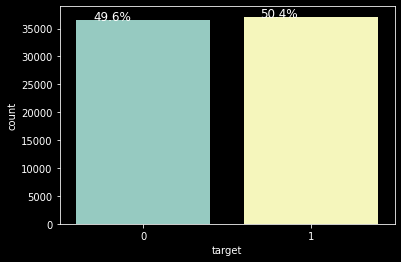

In [35]:
#Checking the dataset is balanced or not based on target values in the classification.
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting the balanced dataset'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')
print("")

plt.style.use('dark_background')
total = len(bal_data['target'])*1
ax=sns.countplot(x='target',data=bal_data)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)
    

<font color=skyblue>Now the data looks much more balanced.</font>

#### <font color=green>7. Encoding the data</font>

#### <font color=red>Label Encoding</font>

In [36]:
print('\nEncoded Data : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

le_data = bal_data.copy()
le = preprocessing.LabelEncoder()
le_data.job = le.fit_transform(le_data.job)
le_data.marital = le.fit_transform(le_data.marital)
le_data.education = le.fit_transform(le_data.education)
le_data.housing = le.fit_transform(le_data.housing)
le_data.loan = le.fit_transform(le_data.loan)
le_data.contact = le.fit_transform(le_data.contact)
le_data.month = le.fit_transform(le_data.month)
le_data.poutcome = le.fit_transform(le_data.poutcome) 

le_data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Encoded Data :  👇🏻👇🏻👇🏻



,age,campaign,pdays1,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,pdays2,job,marital,education,housing,loan,contact,month,poutcome
0,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,3,1,0,0,0,1,6,1
1,57.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,7,1,3,0,0,1,6,1
2,37.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,7,1,3,1,0,1,6,1
3,40.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,1,1,0,0,1,6,1
4,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,7,1,3,0,1,1,6,1
5,45.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,7,1,2,0,0,1,6,1
6,59.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,1,5,0,0,1,6,1
7,41.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,1,1,6,0,0,1,6,1
8,24.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,9,2,5,1,0,1,6,1
9,25.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,7,2,3,1,0,1,6,1


### <font color=green>Splitting the data into train & test</font>

In [37]:
# In label encoded data
print('\nLabel Encoded Data without Target :'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
# addinq a new column 'Target' and dropping old column 'target'
ds = le_data.copy()
ds["Target"] = ds["target"]
ds = ds.drop("target",axis=1)

ds.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#436C3A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Label Encoded Data without Target :   👇🏻👇🏻👇🏻



,age,campaign,pdays1,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,pdays2,job,marital,education,housing,loan,contact,month,poutcome,Target
0,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,3,1,0,0,0,1,6,1,0
1,57.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,7,1,3,0,0,1,6,1,0
2,37.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,7,1,3,1,0,1,6,1,0
3,40.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,1,1,0,0,1,6,1,0
4,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,7,1,3,0,1,1,6,1,0
5,45.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,7,1,2,0,0,1,6,1,0
6,59.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,1,5,0,0,1,6,1,0
7,41.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,1,1,6,0,0,1,6,1,0
8,24.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,9,2,5,1,0,1,6,1,0
9,25.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,7,2,3,1,0,1,6,1,0


In [38]:
# Dividing the label encoded dataset into independent and dependent variables
X = ds.iloc[:, : -1].values
y = ds.iloc[:, -1].values

print("\n",emoji.emojize(":scissors:")*5
      ,"Divided into Dependent & Independent Variables"
      ,emoji.emojize(":scissors:")*5)
# Splitting into train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print("\n",emoji.emojize(":scissors:")*5
      ,"Splitted into Train & Test Data"
      ,emoji.emojize(":scissors:")*5)


 ✂✂✂✂✂ Divided into Dependent & Independent Variables ✂✂✂✂✂

 ✂✂✂✂✂ Splitted into Train & Test Data ✂✂✂✂✂


#### <font color=green>8. Feature Scaling</font>

In [39]:
# Standardization in the label encoded data
scaler = StandardScaler()
X_train[:, : 10] = scaler.fit_transform(X_train[:, : 10])
X_test[:, : 10] = scaler.transform(X_test[:, : 10])

print(emoji.emojize(":triangular_flag:")*5
      ,"Successfully accomplished feature scaling"
      ,emoji.emojize(":triangular_flag:")*5)

🚩🚩🚩🚩🚩 Successfully accomplished feature scaling 🚩🚩🚩🚩🚩


In [40]:
#convert array into dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(emoji.emojize(":thumbs_up_light_skin_tone:")*5
      ,"Converted into Dataframe"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*5)

👍🏻👍🏻👍🏻👍🏻👍🏻 Converted into Dataframe 👍🏻👍🏻👍🏻👍🏻👍🏻


In [41]:
# # saving train & test dataframes as csv files
# X_train.to_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/X_train.csv")
# X_test.to_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/X_test.csv")
# y_train.to_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/y_train.csv")
# y_test.to_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/y_test.csv")

print(emoji.emojize(":file_folder:")*5
      ,"All the Data files are saved successfully !!!"
      ,emoji.emojize(":file_folder:")*5)

📁📁📁📁📁 All the Data files are saved successfully !!! 📁📁📁📁📁
